# "Procesamiento de Imágenes utilizando el método del Gradiente Conjugado"

Paqueterías

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

El algoritmo se define como sigue.

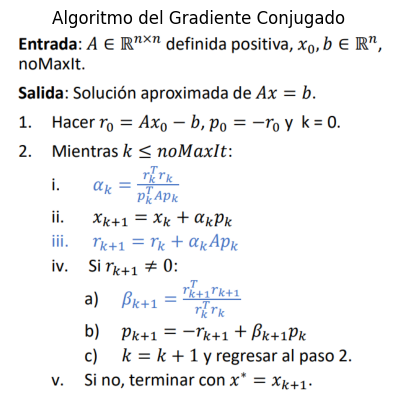

In [41]:
al_gc = plt.imread('al_gc.png')
plt.imshow(al_gc)
plt.title('Algoritmo del Gradiente Conjugado')
plt.axis('off')
plt.show()

en base a esto, creamos el siguiente código general.

In [42]:
#Función grad_conjugado versión 2
#Dada una tolerancia arbitraria, x_0, A\in R^{nxn} definida positiva y b\in R^n.
def grad_conjugado_v2(A, b, x0, tol, max_iter=1000):
    #Definimos r_0 <- Ax_0-b, p_0 <- -r_0 y k <- 0
    r0 = A @ x0 - b
    p0 = -r0
    k = 0
    #Mejora #1, definimos rTr desde antes para evitar calcular el producto de
    #matrices varias veces. También, np.dot es mucho más eficiente.
    rTr0 = np.dot(r0, r0)
    #Aquí podemos hacer que nuesta k sea menor a un 
    #número de iteraciones máximo, pero mejor comparamos
    #el valor del residuo con el valor de la tolerancia
    #para decidir si seguir o no,es decir, si el valor
    #del residuo es suficientemente pequeño y la solución
    #se acerca cada vez más a la solución exacta.
    #Gracias a esto, después no necesitaremos el condicional
    #r_1 distinto de 0, ya que es implícito en el while
    while np.linalg.norm(r0) > tol and k < max_iter:
        #Mejora #2, calculamos A@p0 desde antes para evitar calcularlo 
        #varias veces en un solo ciclo, esto hará que se resuelva mucho más rápido
        Ap0 = A @ p0
        #Definimos el tamaño de paso
        #\alpha <- \frac{r_k^T * r_k}{p_k^T * A * p_k} igual usando np.dot en vez
        #de @
        alpha = rTr0 / np.dot(p0, Ap0)
        #Actualizamos nuestro vector de solución moviéndolo 
        #en alpha pasos hacia la direción p_0
        #x_1 <- x_0 + \alpha * p_0
        x1 = x0 + alpha * p0
        #Calculamos r_1 <- r_0 + \alpha * A * p_0
        r1 = r0 + alpha * Ap0
        #Mejora #3, análogo a la mejora 1, guardamos el valor de rTr en una 
        #variable para no calcularalo varias veces
        rTr1 = np.dot(r1, r1)
        #Calculamos el factor para actualizar la dirección de búsqueda
        #Para asegurar que las direcciones de búsqueda
        #Sean A-conjugadas
        #\beta = frac{r_1^T*r_1}{r_0^T * r_0}
        beta = rTr1 / rTr0
        #calculamos la nueva dirección de búsqueda p_0
        #p_0 <- -r_1 + \beta * p_0
        p0 = -r1 + beta * p0
        #Mejora #4
        #Sumamos 1 a la cantidad de iteraciones y re definimos r0, 
        #y de una vez redefinimos rTr0 PARA NO TENER QUE VOLVER A CALCULARLO
        r0, rTr0 = r1, rTr1
        k += 1

    return x1, k

Utilizaremos una función blanco y negro, ya que tener los datos de la matriz o la imagen normalizada (escala 0-1 de grises) nos facilitará los cálculos. Después, para desenfocar la imagen, utilizaremos un gaussian filter, que utiliza la distribución gaussiana para calcular la contribución de los píxeles circundantes a cada píxel de la imagen original. Esto tiene el efecto de reducir las transiciones bruscas de intensidad en la imagen, lo que produce un efecto de desenfoque.

Esto permitirá tener la imágene original y la desenfocada para comparar el trabajo de nuestro algoritmo.

Ahora, para poder hacer el procesamiento de imágenes, debemos hacerle algunos ajustes al código de gradiente conjugado, para que no sea tan ineficiente computacionalmente. 

Recordemos, que el algoritmo de gradiente conjugado busca resolver el sistema $Ax=B$ con:

* $A$ matriz simétrica
* $b$ vector conocido
* $x$ vector solución+

En nuestro caso $A$ será la matriz de nuestra imagen desenfocada, que dependiendo del tamaño de la imágen puede tener miles, sino millones de pixeles. Esto haría que nuestra matriz correspondiente fuera tan grande que sería imposible de manejar con poco tiempo y memoria, lo que haría que no podamos resolver el problema. Para ello, tendremos que buscar una forma distinta de calcular el producto $Ax$ sin utilizar el operador @ de numpy. 

El desenfoque gaussiano en palabras generales es un timpo de convolución de la matriz de la imagen original, entonces, 

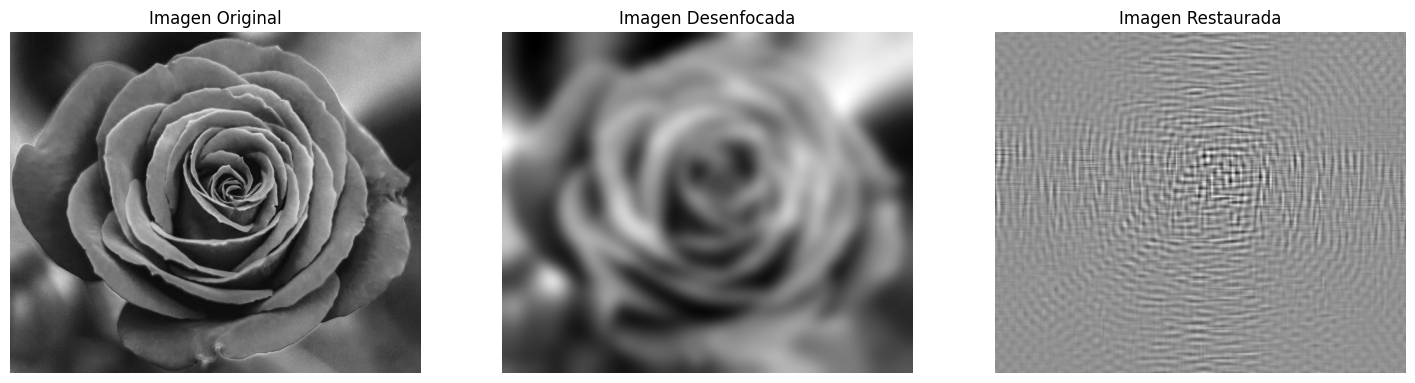

In [47]:
#Método del gradiente conjugado modificado para convolución de matrices
def grad_conj(A_func, b, x0, tol):
    r = b - A_func(x0)
    p = r.copy()
    rtr = np.inner(r, r)
    x = x0.copy()

    for i in range(max_iter):
        Ap = A_func(p)
        alpha = rtr / np.inner(p, Ap)
        x += alpha * p
        r_next = r - alpha * Ap
        rsnew = np.inner(r_next, r_next)
        
        if np.sqrt(rsnew) < tol:
            break
        
        beta = rsnew / rtr
        p = r_next + beta * p
        r = r_next
        rtr = rsnew
    
    return x

#Función que simula Ax aplicando una convolución
def A_func(x):
    #Simula la operación Ax sin construir la matriz A
    return gaussian_filter(x.reshape(imagen_gris.shape), sigma).flatten()

#Cargamos las imágenes y la convertimos a escala de grises
imagen = plt.imread('image2.png')  
imagen_gris = np.mean(imagen, axis=2)

#Aplicamos la función con sigma deseado
sigma = 10
imagen_desenfocada = aplicar_desenfoque_gaussiano(imagen_gris, sigma)

#Definimos los aprámetros para el gradiente conjugado
b = imagen_desenfocada.flatten()
x0 = np.zeros_like(b)
tol = 1e-6
max_iter=10000

#Aplicamos la función con los aprámetros
solucion = grad_conj(A_func, b, x0, tol)

#La solución nos da un vector aplanado, lo recosntruimos
imagen_restaurada = solucion.reshape(imagen_gris.shape)

# Mostrar imágenes
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_desenfocada, cmap='gray')
plt.title('Imagen Desenfocada')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagen_restaurada, cmap='gray')
plt.title('Imagen Restaurada')
plt.axis('off')

plt.show()
